In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [66]:
df_c = pd.read_csv('user_coordinates.csv')
df_c.drop('Unnamed: 0',axis=1,inplace = True)

In [75]:
metal = []
plastic = []
cardboard = []
glass = []
paper = []
for i in range(1000):
    if i%2==0:
        metal.append(1)
        glass.append(0)
    else:
        metal.append(0)
        glass.append(1)
    if i%5==0:
        paper.append(1)
        plastic.append(0)
    else:
        paper.append(0)
        plastic.append(1)
    if i%3==0:
        cardboard.append(1)
    else:
        cardboard.append(0)

In [76]:
df = pd.DataFrame()
df['metal'] = metal
df['plastic'] = plastic
df['cardboard'] = cardboard
df['glass'] = glass
df['paper'] = paper

In [77]:
df_res = pd.concat([df_c, df], axis=1)

In [78]:
df_res.head()

,Longitude,Latitude,metal,plastic,cardboard,glass,paper
0,20.461722,44.810992,1,0,1,0,1
1,20.478675,44.814653,0,1,0,1,0
2,20.479172,44.804900,1,1,0,0,0
3,20.463665,44.810934,0,1,1,1,0
4,20.470855,44.798606,1,1,0,0,0


In [79]:
df_res.to_csv('waste2.csv')

## Metal cluster

In [80]:
df_m = df_res[['Longitude', 'Latitude', 'metal']]
df_m = df_m[df_m['metal']==1]
df_m.drop('metal',axis = 1, inplace = True)
df_m.shape

(500, 2)

In [81]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_m)
scaled_df = pd.DataFrame(scaled_df, columns=df_m.columns)
scaled_df.head()

,Longitude,Latitude
0,0.213345,0.682651
1,0.698788,0.442174
2,0.467396,0.193701
3,0.329393,0.392056
4,0.799165,0.340838


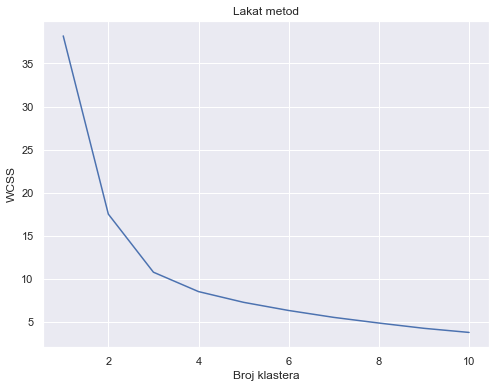

In [82]:
sns.set(rc={'figure.figsize':(8,6)})
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Lakat metod')
plt.xlabel('Broj klastera')
plt.ylabel('WCSS')
plt.show()

In [83]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(scaled_df)
unique, counts = np.unique(y_kmeans, return_counts=True)
unique, counts

(array([0, 1, 2], dtype=int32), array([168, 167, 165]))

In [84]:
df_m['cluster'] = y_kmeans
df_m.to_csv('clustered_metal2.csv')

In [85]:
df_m.head()

,Longitude,Latitude,cluster
0,20.461722,44.810992,2
2,20.479172,44.804900,0
4,20.470855,44.798606,1
6,20.465894,44.803631,1
8,20.482781,44.802333,0


In [86]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers

array([[20.47690677, 44.80802897],
       [20.47160508, 44.80171042],
       [20.46298971, 44.81230572]])

## Plastic  cluster

In [87]:
df_p = df_res[['Longitude', 'Latitude', 'plastic']]
df_p = df_p[df_p['plastic']==1]
df_p.drop('plastic',axis = 1, inplace = True)
df_p.shape

(800, 2)

In [88]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_p)
scaled_df = pd.DataFrame(scaled_df, columns=df_p.columns)
scaled_df.head()

,Longitude,Latitude
0,0.687633,0.773180
1,0.701345,0.413296
2,0.273591,0.635938
3,0.471916,0.181050
4,0.335085,0.366451


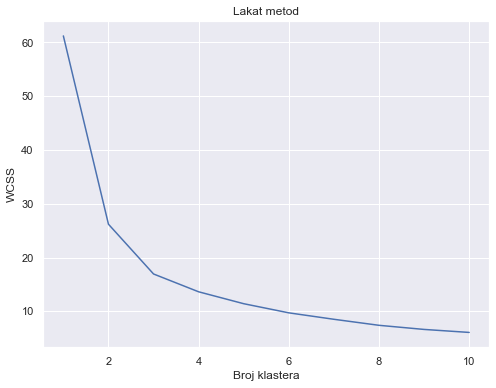

In [89]:
sns.set(rc={'figure.figsize':(8,6)})
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Lakat metod')
plt.xlabel('Broj klastera')
plt.ylabel('WCSS')
plt.show()

In [90]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(scaled_df)
unique, counts = np.unique(y_kmeans, return_counts=True)
unique, counts

(array([0, 1, 2], dtype=int32), array([289, 252, 259]))

In [100]:
df_p['cluster'] = y_kmeans
df_p.to_csv('clustered_plastic2.csv')

In [92]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers

array([[20.46285871, 44.81231123],
       [20.47741926, 44.80789205],
       [20.47231943, 44.80156402]])

## Cardboard cluster

In [93]:
df_c = df_res[['Longitude', 'Latitude', 'cardboard']]
df_c = df_c[df_c['cardboard']==1]
df_c.drop('cardboard',axis = 1, inplace = True)
df_c.shape

(334, 2)

In [94]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_c)
scaled_df = pd.DataFrame(scaled_df, columns=df_c.columns)
scaled_df.head()

,Longitude,Latitude
0,0.274736,0.608533
1,0.326932,0.606230
2,0.386850,0.314751
3,0.360774,0.634075
4,0.559984,0.419361


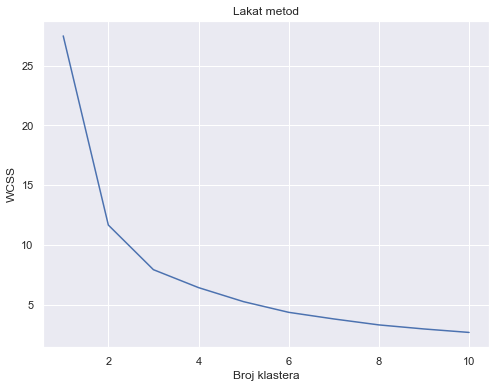

In [95]:
sns.set(rc={'figure.figsize':(8,6)})
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Lakat metod')
plt.xlabel('Broj klastera')
plt.ylabel('WCSS')
plt.show()

In [96]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(scaled_df)
unique, counts = np.unique(y_kmeans, return_counts=True)
unique, counts

(array([0, 1], dtype=int32), array([139, 195]))

In [97]:
df_c['cluster'] = y_kmeans
df_c.to_csv('clustered_cardboard2.csv')

In [98]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers

array([[20.4633211 , 44.81232372],
       [20.47509341, 44.80462043]])

## Glass cluster

In [101]:
df_g = df_res[['Longitude', 'Latitude', 'glass']]
df_g = df_g[df_g['glass']==1]
df_g.drop('glass',axis = 1, inplace = True)
df_g.shape

(500, 2)

In [102]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_g)
scaled_df = pd.DataFrame(scaled_df, columns=df_g.columns)
scaled_df.head()

,Longitude,Latitude
0,0.719262,0.766439
1,0.321964,0.625119
2,0.728181,0.473946
3,0.744358,0.317637
4,0.355291,0.651629


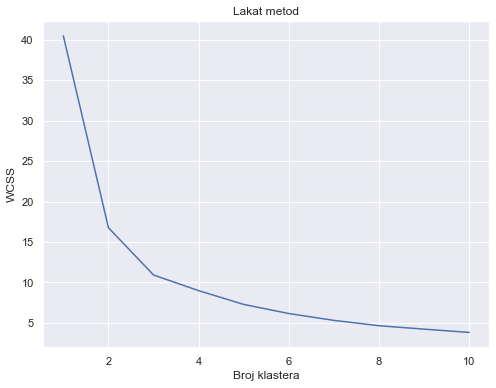

In [103]:
sns.set(rc={'figure.figsize':(8,6)})
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Lakat metod')
plt.xlabel('Broj klastera')
plt.ylabel('WCSS')
plt.show()

In [104]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(scaled_df)
unique, counts = np.unique(y_kmeans, return_counts=True)
unique, counts

(array([0, 1], dtype=int32), array([204, 296]))

In [105]:
df_g['cluster'] = y_kmeans
df_g.to_csv('clustered_glass2.csv')

In [106]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers

array([[20.46293004, 44.81233567],
       [20.47522557, 44.80441977]])

## Paper cluster

In [107]:
df_pa = df_res[['Longitude', 'Latitude', 'paper']]
df_pa = df_pa[df_pa['paper']==1]
df_pa.drop('paper',axis = 1, inplace = True)
df_pa.shape

(200, 2)

In [108]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_pa)
scaled_df = pd.DataFrame(scaled_df, columns=df_pa.columns)
scaled_df.head()

,Longitude,Latitude
0,0.270561,0.667460
1,0.728181,0.504279
2,0.261465,0.705627
3,0.396527,0.772239
4,0.739795,0.359721


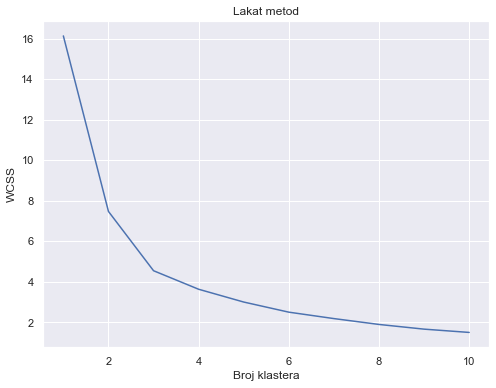

In [109]:
sns.set(rc={'figure.figsize':(8,6)})
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Lakat metod')
plt.xlabel('Broj klastera')
plt.ylabel('WCSS')
plt.show()

In [110]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(scaled_df)
unique, counts = np.unique(y_kmeans, return_counts=True)
unique, counts

(array([0, 1, 2], dtype=int32), array([77, 75, 48]))

In [111]:
df_pa['cluster'] = y_kmeans
df_pa.to_csv('clustered_paper2.csv')

In [112]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers

array([[20.4724586 , 44.80206165],
       [20.4626903 , 44.81232816],
       [20.47684476, 44.80946865]])